# Case Studies

## Project: 1
### Week 4

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)
 - Aymane Hachcham (236392)

## Preprocessing
### Variable transformation
Evaluate the quadratic nature of the target variable (measured_sysstolic) and transform it to a quadratic form if necessary. If the quadratic nature of the target variable is not significant, then the transformation is not necessary.

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from helper_functions import *

In [2]:
# constants

# setting criterion for best subset selection
BEST_SUBSET_CRITERION = "mse"
PLOTS_DIR = "LinearModel_plots"

if not os.path.isdir(PLOTS_DIR):
    os.mkdir(PLOTS_DIR)

In [3]:
data_df = read_data()

c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


### Large preprocessing

In [4]:
# variables that are dropped 
to_filter = ["id", "zeit", "postleitzahl", "gemeinde", "bezirk", "geburtsjahr", "schaetzwert_bp_sys", "schaetzwert_by_dia"]
data_df, cat_feat_list, num_feat_list = format_variables(data_df, to_filter=to_filter, drop_values=True)

# one hot encoding cat variables to prep data for Decision Tree
# ordinal variables and nominal are treated the same in trees, but need to be careful in Lin models

encoded_data_df = encode_data(data_df, cat_feat_list, num_feat_list)
encoded_train_set, encoded_test_set = train_test_split(encoded_data_df, test_size=0.3)

In [5]:
data_df.isna().sum()

terminal               0
bundesland             0
befinden               0
geschlecht             0
raucher                0
blutzucker_bekannt     0
cholesterin_bekannt    0
in_behandlung          0
messwert_bp_sys        0
messwert_bp_dia        0
age                    0
month                  0
hour                   0
day                    0
temp                   0
humidity               0
temp_min               0
temp_max               0
dtype: int64

In [6]:
# transforming to dummy vars
encoded_data_df = encode_data(data_df, cat_feat_list, num_feat_list)
encoded_train_set, encoded_test_set = train_test_split(encoded_data_df, test_size=0.3)

In [7]:
encoded_test_set.columns

Index(['terminal_2', 'terminal_3a', 'terminal_3b', 'bundesland_Kärnten',
       'bundesland_Niederösterreich', 'bundesland_Oberösterreich',
       'bundesland_Salzburg', 'bundesland_Steiermark', 'bundesland_Tirol',
       'bundesland_Vorarlberg', 'bundesland_Wien', 'bundesland_not_applicable',
       'befinden_2', 'befinden_3', 'befinden_4', 'befinden_5', 'geschlecht_m',
       'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True',
       'in_behandlung_True', 'month_Aug', 'month_Jul', 'month_Jun',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'messwert_bp_sys', 'messwert_bp_dia', 'age', 'hour',
       'temp', 'humidity', 'temp_min', 'temp_max'],
      dtype='object')

In [8]:
print("Size of training data: ", len(encoded_train_set))
print("Size of testing data: ", len(encoded_test_set))
print("Features used: ", data_df.columns)

Size of training data:  10404
Size of testing data:  4460
Features used:  Index(['terminal', 'bundesland', 'befinden', 'geschlecht', 'raucher',
       'blutzucker_bekannt', 'cholesterin_bekannt', 'in_behandlung',
       'messwert_bp_sys', 'messwert_bp_dia', 'age', 'month', 'hour', 'day',
       'temp', 'humidity', 'temp_min', 'temp_max'],
      dtype='object')


### Models for Diastolic as target

In [9]:
target_dia = "messwert_bp_dia"
X_train_dia, Y_train_dia = separate_target(encoded_train_set, target_dia)
X_test_dia, Y_test_dia = separate_target(encoded_test_set, target_dia)

Base Model

In [10]:
train_results_base_dia, test_results_base_dia, model_base_dia = fit_model(X_train_dia, Y_train_dia, X_test_dia,
                                                                        Y_test_dia, "LinearRegression")
model_base_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     226.9
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        02:45:42   Log-Likelihood:                -39069.
No. Observations:               10404   AIC:                         7.822e+04
Df Residuals:                   10362   BIC:                         7.853e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      18.7946      2.392      7.856      0.000      14.105      23.484
terminal_2                      1.9449      0.247      7.876      0.000       1.461       2.429
terminal_3a                    -1.2479      0.419     -2.981      0.003      -2.068      -0.427
terminal_3b                    -0.6710      0.290     -2.316      0.021      -1.239      -0.103
bundesland_Kärnten             -2.2591      1.471     -1.536      0.125      -5.143       0.625
bundesland_Niederösterreich    -1.6394      1.302     -1.259      0.208      -4.192       0.913
bundesland_Oberösterreich      -1.7391      1.444     -1.204      0.229      -4.571       1.092
bundesland_Salzburg            -0.4074      1.777     -0.229      0.819      -3.890       3.075
bundesland_Steiermark          -1.4835      1.160     -1.279      0.201      -3.757       0.789
bundesland_Tirol               -1.6314      1.891     -0.863      0.388      -5.337       2.074
bundesland_Vorarlberg           0.5143      2.923      0.176      0.860      -5.215       6.243
bundesland_Wien                -0.9295      1.292     -0.720      0.472      -3.462       1.603
bundesland_not_applicable      -1.8763      1.394     -1.346      0.178      -4.609       0.856
befinden_2                     -0.7195      0.229     -3.140      0.002      -1.169      -0.270
befinden_3                     -0.2442      0.327     -0.746      0.456      -0.886       0.398
befinden_4                     -0.3979      0.969     -0.411      0.681      -2.296       1.501
befinden_5                      3.7336      1.613      2.314      0.021       0.571       6.896
geschlecht_m                    1.2023      0.208      5.779      0.000       0.795       1.610
raucher_True                    0.0357      0.282      0.126      0.899      -0.518       0.589
blutzucker_bekannt_True        -0.2325      0.291     -0.800      0.424      -0.802       0.337
cholesterin_bekannt_True        0.1427      0.270      0.529      0.597      -0.386       0.671
in_behandlung_True             -1.6391      0.329     -4.985      0.000      -2.284      -0.995
month_Aug                       0.7421      0.786      0.944      0.345      -0.799       2.283
month_Jul                      -0.5602      0.898     -0.624      0.533      -2.321       1.200
month_Jun                       0.4529      0.825      0.549      0.583      -1.165       2.071
month_May                       0.5684      0.778      0.731      0.465      -0.956       2.092
month_Nov                      21.4579     10.456      2.052      0.040       0.962      41.954
month_Oct                      -3.2398      0.782     -4.142      0.000      -4.773      -1.707
month_Sep                      -2.7086      0.791     -3.425      0.001      -4.259      -1.158
day_Monday 

In [11]:
print(model_base_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      18.7946  &        2.392     &     7.856  &         0.000        &       14.105    &       23.484     \\
\textbf{terminal\_2}                  &       1.9449  &        0.247     &     7.876  &         0.000        &        1.461    &        2.429     \\
\textbf{terminal\_3a}                 &      -1.2479  &        0.419     &    -2.981  &         0.003        &       -2.068    &       -0.427     \\
\textbf{terminal\_3b}                 &      -0.6710  &        0.290     &    -2.316  &         0.021        &       -1.239    &       -0.103     \\
\textbf{bundesland\_Kärnten}          &      -2.2591  &        1.471     &    -1.536  &         0.125        &       -5.143    &        0.625     \\
\textbf{bundesland\_Niederösterreich} &      -1.6

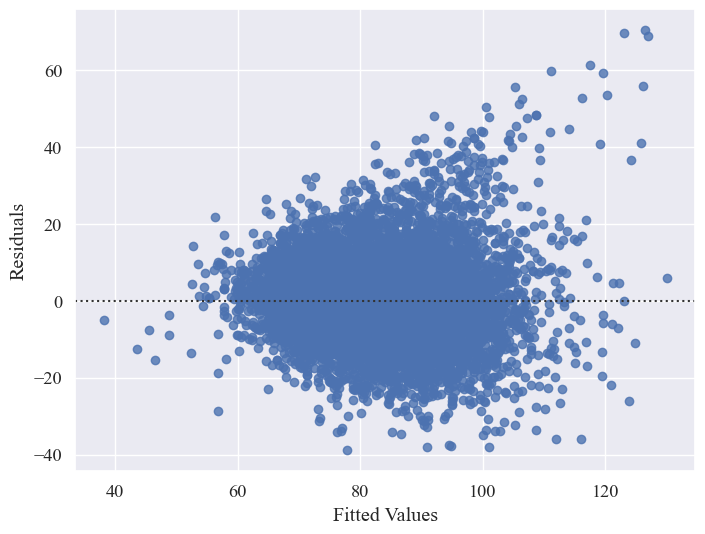

In [12]:
generate_residual_plot(model_base_dia, os.path.join(PLOTS_DIR, target_dia + "_base"))

<Figure size 800x600 with 0 Axes>

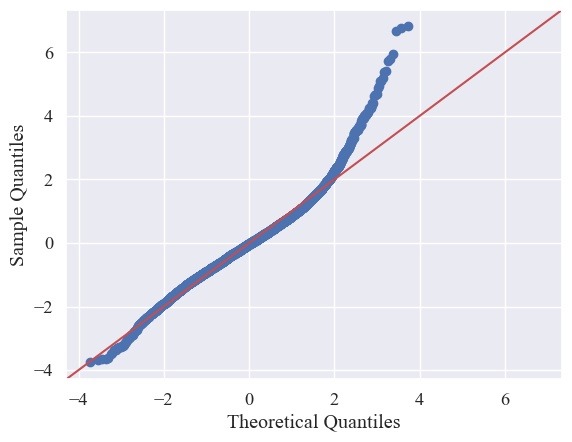

In [13]:
generate_qq_plot(model_base_dia, os.path.join(PLOTS_DIR, target_dia + "_base"))

Best Subset

In [14]:
model_type = "LinearRegression"
features = list(X_train_dia.columns)
model_best_dia, train_results_best_dia, test_results_best_dia  = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_dia, Y_train_dia, X_test_dia, Y_test_dia,
                                                     model_type, {}, 1)


Best Model: 
Features:  ['terminal_2', 'terminal_3a', 'terminal_3b', 'bundesland_Kärnten', 'bundesland_Niederösterreich', 'bundesland_Oberösterreich', 'bundesland_Salzburg', 'bundesland_Steiermark', 'bundesland_Tirol', 'bundesland_Vorarlberg', 'bundesland_Wien', 'bundesland_not_applicable', 'befinden_2', 'befinden_3', 'befinden_4', 'befinden_5', 'geschlecht_m', 'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'month_Aug', 'month_Jul', 'month_Jun', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'messwert_bp_sys', 'age', 'hour', 'temp', 'humidity', 'temp_min', 'temp_max']
Train Results:  {'r_2': 0.47305647663419403, 'adjusted_r_2': 0.4709714848895503, 'mse': 106.9566794251977}
Test Results:  {'r_2': 0.45688074806529544, 'adjusted_r_2': 0.45184048339138805, 'mse': 106.48045634537444}


In [15]:
model_best_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     226.9
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        02:46:21   Log-Likelihood:                -39069.
No. Observations:               10404   AIC:                         7.822e+04
Df Residuals:                   10362   BIC:                         7.853e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      18.7946      2.392      7.856      0.000      14.105      23.484
terminal_2                      1.9449      0.247      7.876      0.000       1.461       2.429
terminal_3a                    -1.2479      0.419     -2.981      0.003      -2.068      -0.427
terminal_3b                    -0.6710      0.290     -2.316      0.021      -1.239      -0.103
bundesland_Kärnten             -2.2591      1.471     -1.536      0.125      -5.143       0.625
bundesland_Niederösterreich    -1.6394      1.302     -1.259      0.208      -4.192       0.913
bundesland_Oberösterreich      -1.7391      1.444     -1.204      0.229      -4.571       1.092
bundesland_Salzburg            -0.4074      1.777     -0.229      0.819      -3.890       3.075
bundesland_Steiermark          -1.4835      1.160     -1.279      0.201      -3.757       0.789
bundesland_Tirol               -1.6314      1.891     -0.863      0.388      -5.337       2.074
bundesland_Vorarlberg           0.5143      2.923      0.176      0.860      -5.215       6.243
bundesland_Wien                -0.9295      1.292     -0.720      0.472      -3.462       1.603
bundesland_not_applicable      -1.8763      1.394     -1.346      0.178      -4.609       0.856
befinden_2                     -0.7195      0.229     -3.140      0.002      -1.169      -0.270
befinden_3                     -0.2442      0.327     -0.746      0.456      -0.886       0.398
befinden_4                     -0.3979      0.969     -0.411      0.681      -2.296       1.501
befinden_5                      3.7336      1.613      2.314      0.021       0.571       6.896
geschlecht_m                    1.2023      0.208      5.779      0.000       0.795       1.610
raucher_True                    0.0357      0.282      0.126      0.899      -0.518       0.589
blutzucker_bekannt_True        -0.2325      0.291     -0.800      0.424      -0.802       0.337
cholesterin_bekannt_True        0.1427      0.270      0.529      0.597      -0.386       0.671
in_behandlung_True             -1.6391      0.329     -4.985      0.000      -2.284      -0.995
month_Aug                       0.7421      0.786      0.944      0.345      -0.799       2.283
month_Jul                      -0.5602      0.898     -0.624      0.533      -2.321       1.200
month_Jun                       0.4529      0.825      0.549      0.583      -1.165       2.071
month_May                       0.5684      0.778      0.731      0.465      -0.956       2.092
month_Nov                      21.4579     10.456      2.052      0.040       0.962      41.954
month_Oct                      -3.2398      0.782     -4.142      0.000      -4.773      -1.707
month_Sep                      -2.7086      0.791     -3.425      0.001      -4.259      -1.158
day_Monday 

In [16]:
print(model_best_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      18.7946  &        2.392     &     7.856  &         0.000        &       14.105    &       23.484     \\
\textbf{terminal\_2}                  &       1.9449  &        0.247     &     7.876  &         0.000        &        1.461    &        2.429     \\
\textbf{terminal\_3a}                 &      -1.2479  &        0.419     &    -2.981  &         0.003        &       -2.068    &       -0.427     \\
\textbf{terminal\_3b}                 &      -0.6710  &        0.290     &    -2.316  &         0.021        &       -1.239    &       -0.103     \\
\textbf{bundesland\_Kärnten}          &      -2.2591  &        1.471     &    -1.536  &         0.125        &       -5.143    &        0.625     \\
\textbf{bundesland\_Niederösterreich} &      -1.6

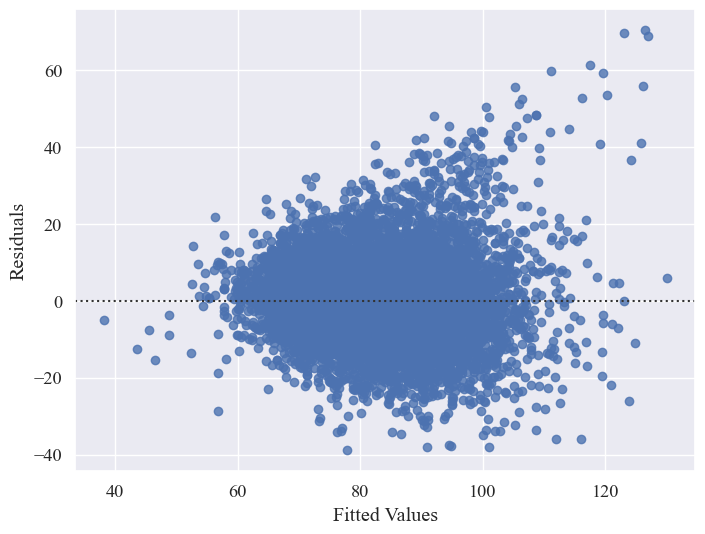

In [17]:
generate_residual_plot(model_best_dia, os.path.join(PLOTS_DIR, target_dia + "_best"))

<Figure size 800x600 with 0 Axes>

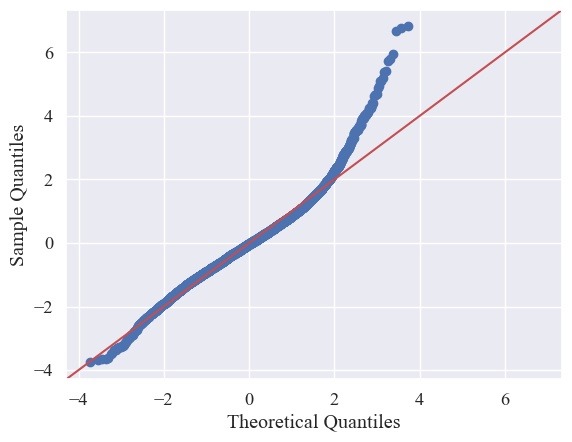

In [18]:
generate_qq_plot(model_best_dia, os.path.join(PLOTS_DIR, target_dia + "_best"))

In [19]:
train_result_list = [train_results_base_dia, train_results_best_dia]

test_result_list = [test_results_base_dia, test_results_best_dia]

model_names = ["LM (Base)", "LM (Best Subset)"]

tab = tabularize_model_metrics(train_result_list, test_result_list, model_names)
round(tab, 3)

,Model,Train Mean Sq Error,Test Mean Sq Error,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,LM (Base),106.957,106.48,0.473,0.457,0.471,0.452
1,LM (Best Subset),106.957,106.48,0.473,0.457,0.471,0.452


In [20]:
test_results_base_dia

{'r_2': 0.45688074806529544,
 'adjusted_r_2': 0.45184048339138805,
 'mse': 106.48045634537444}

In [21]:
print(tab.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
 & Model & Train Mean Sq Error & Test Mean Sq Error & Train R2 & Test R2 & Train Adjusted R2 & Test Adjusted R2 \\
\midrule
0 & LM (Base) & 106.956679 & 106.480456 & 0.473056 & 0.456881 & 0.470971 & 0.451840 \\
1 & LM (Best Subset) & 106.956679 & 106.480456 & 0.473056 & 0.456881 & 0.470971 & 0.451840 \\
\bottomrule
\end{tabular}



### Models for Systolic as target

In [22]:
target_sys = "messwert_bp_sys"
X_train_sys, Y_train_sys = separate_target(encoded_train_set, target_sys)
X_test_sys, Y_test_sys = separate_target(encoded_test_set, target_sys)

Base Model

In [23]:
train_results_base_sys, test_results_base_sys, model_base_sys = fit_model(X_train_sys, Y_train_sys, X_test_sys,
                                                                        Y_test_sys, "LinearRegression")
model_base_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     299.0
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        02:46:23   Log-Likelihood:                -41456.
No. Observations:               10404   AIC:                         8.300e+04
Df Residuals:                   10362   BIC:                         8.330e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      55.8822      2.968     18.828      0.000      50.064      61.700
terminal_2                     -3.3801      0.310    -10.912      0.000      -3.987      -2.773
terminal_3a                     0.3803      0.527      0.722      0.470      -0.652       1.413
terminal_3b                     2.1488      0.364      5.905      0.000       1.436       2.862
bundesland_Kärnten              1.0256      1.851      0.554      0.579      -2.602       4.653
bundesland_Niederösterreich     0.7727      1.638      0.472      0.637      -2.438       3.984
bundesland_Oberösterreich       0.9796      1.817      0.539      0.590      -2.582       4.541
bundesland_Salzburg            -3.6848      2.234     -1.649      0.099      -8.065       0.695
bundesland_Steiermark           0.1215      1.459      0.083      0.934      -2.738       2.981
bundesland_Tirol               -2.1700      2.378     -0.913      0.362      -6.832       2.492
bundesland_Vorarlberg          -3.1340      3.676     -0.852      0.394     -10.340       4.072
bundesland_Wien                -0.4422      1.625     -0.272      0.786      -3.627       2.743
bundesland_not_applicable      -1.0562      1.753     -0.602      0.547      -4.493       2.381
befinden_2                      1.0774      0.288      3.738      0.000       0.512       1.642
befinden_3                      0.0675      0.412      0.164      0.870      -0.740       0.875
befinden_4                      0.3368      1.218      0.276      0.782      -2.051       2.725
befinden_5                     -3.1567      2.030     -1.555      0.120      -7.135       0.822
geschlecht_m                    1.6332      0.262      6.242      0.000       1.120       2.146
raucher_True                   -0.2018      0.355     -0.568      0.570      -0.898       0.495
blutzucker_bekannt_True         0.7636      0.365      2.090      0.037       0.047       1.480
cholesterin_bekannt_True       -0.2873      0.339     -0.847      0.397      -0.952       0.378
in_behandlung_True              6.0966      0.410     14.880      0.000       5.293       6.900
month_Aug                      -2.8868      0.989     -2.920      0.004      -4.825      -0.949
month_Jul                      -2.7214      1.129     -2.410      0.016      -4.935      -0.508
month_Jun                      -3.2285      1.038     -3.111      0.002      -5.263      -1.194
month_May                      -1.1178      0.978     -1.143      0.253      -3.035       0.799
month_Nov                       0.6244     13.156      0.047      0.962     -25.163      26.412
month_Oct                       1.9373      0.985      1.968      0.049       0.007       3.867
month_Sep                       1.0697      0.995      1.075      0.282      -0.881       3.021
day_Monday 

In [24]:
print(model_base_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      55.8822  &        2.968     &    18.828  &         0.000        &       50.064    &       61.700     \\
\textbf{terminal\_2}                  &      -3.3801  &        0.310     &   -10.912  &         0.000        &       -3.987    &       -2.773     \\
\textbf{terminal\_3a}                 &       0.3803  &        0.527     &     0.722  &         0.470        &       -0.652    &        1.413     \\
\textbf{terminal\_3b}                 &       2.1488  &        0.364     &     5.905  &         0.000        &        1.436    &        2.862     \\
\textbf{bundesland\_Kärnten}          &       1.0256  &        1.851     &     0.554  &         0.579        &       -2.602    &        4.653     \\
\textbf{bundesland\_Niederösterreich} &       0.7

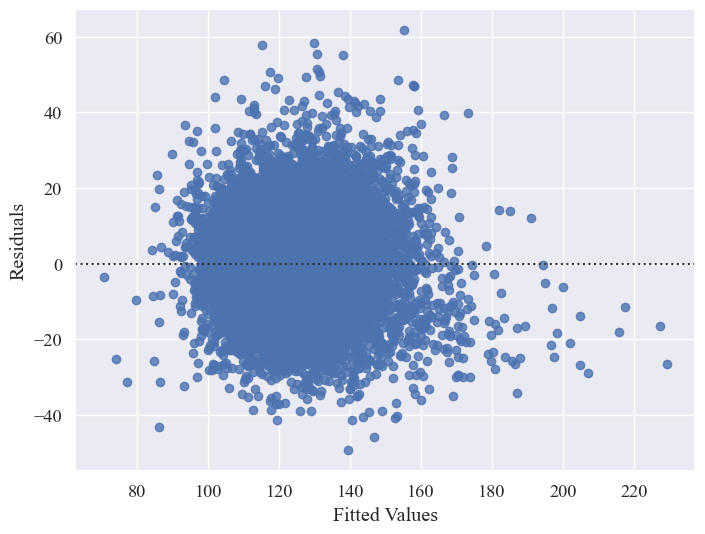

In [25]:
generate_residual_plot(model_base_sys, os.path.join(PLOTS_DIR, target_sys + "_base"))

<Figure size 800x600 with 0 Axes>

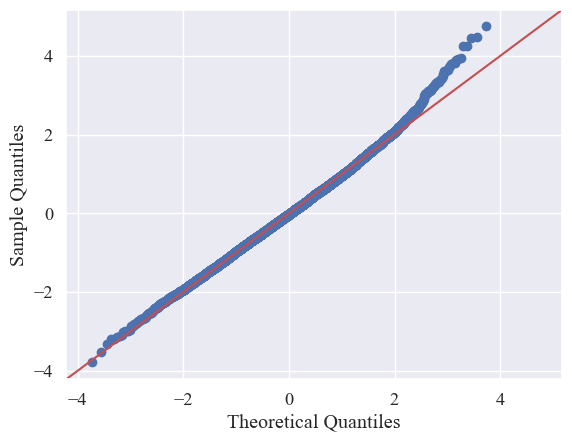

In [26]:
generate_qq_plot(model_base_sys, os.path.join(PLOTS_DIR, target_sys + "_base"))

Base Best Subset

In [27]:
model_type = "LinearRegression"
features = list(X_train_sys.columns)
model_best_sys, train_results_best_sys, test_results_best_sys = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_sys, Y_train_sys, X_test_sys, Y_test_sys,
                                                     model_type, {}, 1)


Best Model: 
Features:  ['terminal_2', 'terminal_3a', 'terminal_3b', 'bundesland_Kärnten', 'bundesland_Niederösterreich', 'bundesland_Oberösterreich', 'bundesland_Salzburg', 'bundesland_Steiermark', 'bundesland_Tirol', 'bundesland_Vorarlberg', 'bundesland_Wien', 'bundesland_not_applicable', 'befinden_2', 'befinden_3', 'befinden_4', 'befinden_5', 'geschlecht_m', 'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'month_Aug', 'month_Jul', 'month_Jun', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'messwert_bp_dia', 'age', 'hour', 'temp', 'humidity', 'temp_min', 'temp_max']
Train Results:  {'r_2': 0.541918229468774, 'adjusted_r_2': 0.5401057075046956, 'mse': 169.23910882960232}
Test Results:  {'r_2': 0.529253609229775, 'adjusted_r_2': 0.5248849804335823, 'mse': 174.80834142314345}


In [28]:
model_best_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     299.0
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        02:47:03   Log-Likelihood:                -41456.
No. Observations:               10404   AIC:                         8.300e+04
Df Residuals:                   10362   BIC:                         8.330e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      55.8822      2.968     18.828      0.000      50.064      61.700
terminal_2                     -3.3801      0.310    -10.912      0.000      -3.987      -2.773
terminal_3a                     0.3803      0.527      0.722      0.470      -0.652       1.413
terminal_3b                     2.1488      0.364      5.905      0.000       1.436       2.862
bundesland_Kärnten              1.0256      1.851      0.554      0.579      -2.602       4.653
bundesland_Niederösterreich     0.7727      1.638      0.472      0.637      -2.438       3.984
bundesland_Oberösterreich       0.9796      1.817      0.539      0.590      -2.582       4.541
bundesland_Salzburg            -3.6848      2.234     -1.649      0.099      -8.065       0.695
bundesland_Steiermark           0.1215      1.459      0.083      0.934      -2.738       2.981
bundesland_Tirol               -2.1700      2.378     -0.913      0.362      -6.832       2.492
bundesland_Vorarlberg          -3.1340      3.676     -0.852      0.394     -10.340       4.072
bundesland_Wien                -0.4422      1.625     -0.272      0.786      -3.627       2.743
bundesland_not_applicable      -1.0562      1.753     -0.602      0.547      -4.493       2.381
befinden_2                      1.0774      0.288      3.738      0.000       0.512       1.642
befinden_3                      0.0675      0.412      0.164      0.870      -0.740       0.875
befinden_4                      0.3368      1.218      0.276      0.782      -2.051       2.725
befinden_5                     -3.1567      2.030     -1.555      0.120      -7.135       0.822
geschlecht_m                    1.6332      0.262      6.242      0.000       1.120       2.146
raucher_True                   -0.2018      0.355     -0.568      0.570      -0.898       0.495
blutzucker_bekannt_True         0.7636      0.365      2.090      0.037       0.047       1.480
cholesterin_bekannt_True       -0.2873      0.339     -0.847      0.397      -0.952       0.378
in_behandlung_True              6.0966      0.410     14.880      0.000       5.293       6.900
month_Aug                      -2.8868      0.989     -2.920      0.004      -4.825      -0.949
month_Jul                      -2.7214      1.129     -2.410      0.016      -4.935      -0.508
month_Jun                      -3.2285      1.038     -3.111      0.002      -5.263      -1.194
month_May                      -1.1178      0.978     -1.143      0.253      -3.035       0.799
month_Nov                       0.6244     13.156      0.047      0.962     -25.163      26.412
month_Oct                       1.9373      0.985      1.968      0.049       0.007       3.867
month_Sep                       1.0697      0.995      1.075      0.282      -0.881       3.021
day_Monday 

In [29]:
print(model_best_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      55.8822  &        2.968     &    18.828  &         0.000        &       50.064    &       61.700     \\
\textbf{terminal\_2}                  &      -3.3801  &        0.310     &   -10.912  &         0.000        &       -3.987    &       -2.773     \\
\textbf{terminal\_3a}                 &       0.3803  &        0.527     &     0.722  &         0.470        &       -0.652    &        1.413     \\
\textbf{terminal\_3b}                 &       2.1488  &        0.364     &     5.905  &         0.000        &        1.436    &        2.862     \\
\textbf{bundesland\_Kärnten}          &       1.0256  &        1.851     &     0.554  &         0.579        &       -2.602    &        4.653     \\
\textbf{bundesland\_Niederösterreich} &       0.7

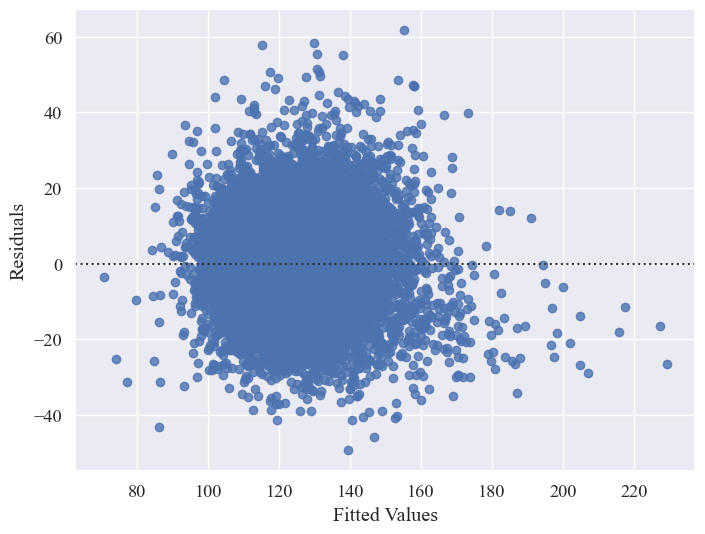

In [30]:
generate_residual_plot(model_best_sys, os.path.join(PLOTS_DIR, target_sys + "_best"))

<Figure size 800x600 with 0 Axes>

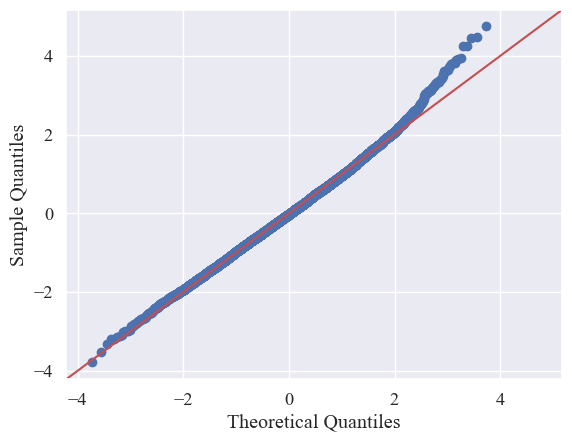

In [31]:
generate_qq_plot(model_best_sys, os.path.join(PLOTS_DIR, target_sys + "_best"))

In [32]:
train_result_list = [train_results_base_sys, train_results_best_sys]

test_result_list = [test_results_base_sys, test_results_best_sys]

model_names = ["LM (Base)", "LM (Best Subset)"]

tab = tabularize_model_metrics(train_result_list, test_result_list, model_names)
round(tab, 3)

,Model,Train Mean Sq Error,Test Mean Sq Error,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,LM (Base),169.239,174.808,0.542,0.529,0.54,0.525
1,LM (Best Subset),169.239,174.808,0.542,0.529,0.54,0.525


In [33]:
print(tab.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
 & Model & Train Mean Sq Error & Test Mean Sq Error & Train R2 & Test R2 & Train Adjusted R2 & Test Adjusted R2 \\
\midrule
0 & LM (Base) & 169.239109 & 174.808341 & 0.541918 & 0.529254 & 0.540106 & 0.524885 \\
1 & LM (Best Subset) & 169.239109 & 174.808341 & 0.541918 & 0.529254 & 0.540106 & 0.524885 \\
\bottomrule
\end{tabular}

